# Assignment 2:  SARSA, expected SARSA, Q-learning, and double Q-learning & bias-variance tradeoff in Expected SARSA vs. SARSA
 In this assignment, I explored SARSA, expected SARSA, Q-learning, and double Q-learning on two domains (a simple maze and the cliff walking problem). I first explored the bias-variance trade-off in Expected SARSA vs. SARSA by presenting the variance analysis from section 5 in the paper "A Theoretical and Empirical Analysis of Expected Sarsa". Then the results of these four algorithms on the simple maze and cliff walking problem are presented. The empirical results support the paper's claim that the expected SARSA learns faster than SARSA on some domains. On the other side, I notice that in some domains (like the Maximization Bias Example or the cliff walking), double Q-learning perform better than Q-learning. It is also interesting to discover that the optimal paths found by different algorithms are very different in cliff walking problem.  

## 1. Introduction about various TD control methods 
Temporal-difference methods are combinations of ideas from Dynamic programming and Monte Carlo methods. It involves both bootstrapping and sampling. 

* TD(0): $V(S_t) \leftarrow V(S_t) + \alpha [r_{t+1}+\gamma V(s_{t+1})-V(S_t)]$.

On-policy TD methods: SARSA and Expected SARSA<br /> 
Off-policy TD method: Q-learning, double Q-learning

Consider transitions from sate-action pairs to state-action pairs:
* SARSA (on-policy TD control) based on $Q(s_{t+1},a_{t+1})$:<br />
$Q(S_t,a_t) \leftarrow Q(S_t,a_t) + \alpha [r_{t+1} + \gamma Q(s_{t+1},a_{t+1})-Q(s_t,a_t)]$ <br /> 


* Expected SARSA based on $E[Q(s_{t+1},a_{t+1})]$:<br />
$Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha [r_{t+1}+ \gamma \sum_{a} \pi(s_{t+1},a)Q(s_{t+1},a)-Q(s_t,a_t)]$


* Q-learning:<br />
$Q(s_t,a_t) \leftarrow Q(s_t,a_t)+ \alpha [r_{t+1}+\gamma \text{max}_aQ(s_{t+1},a)-Q(s_t,a_t)]$

* Double Q-learning: <br />
with the probability 0.5: 
$Q_1(s_t,a_t) \leftarrow Q_1(s_t,a_t)+ \alpha [r_{t+1}+\gamma Q_2(s_{t+1}, \text{argmax}_aQ_1(s_{t+1},a))-Q(s_t,a_t)]$
else: 
$Q_2(s_t,a_t) \leftarrow Q_2(s_t,a_t)+ \alpha [r_{t+1}+\gamma Q_1(s_{t+1}, \text{argmax}_aQ_2(s_{t+1},a))-Q(s_t,a_t)]$

Compare SARSA and Expected SARSA:
1. Expected SARSA shares the same convergence guarantees as SARSA
2. Expected SARSA has lower variance in its update than SARSA <br />
Low variance is important because $\alpha$ can be increased in order to speed up learning.

## 2. Variance Analysis of Expected SARSA and SARSA:
Let $v_t=r_t+\gamma \sum_{a} \pi_t(s_{t+1},a)Q(s_{t+1},a)$ and $\hat v_t = r_t + \gamma Q_t(s_{t+1},a_{t+1})$ be the target of Expected-SARSA and SARSA, respectively.

then $Bias(s,a)=Q^{\pi}(s,a)-E[X_t]$, $X_t = v_t$ or $\hat v_t$. Both algorithm have the same bias $E[v_t]=E[\hat v_t]$, then the variance is:<br />
$Var(s,a)=E[(X_t)^2]-(E[X_t])^2$

Variance for SARSA: 
define $T(s,a,s')=T_{sa}^{s'}=P(s'|s,a)$ and $R(s,a,s')=R_{sa}^{s'} E(r|s,a,s')$, then

$Var(s,a) = \sum_{s^0} T_{sa}^{s^0}\big( \gamma^2 \sum_{a^0}\pi_{s^0a^0}(Q_t(s',a'))^2 + (R^{s^0}_{sa})^2 +2\gamma R_{sa}^{s^0}\sum{a^0}\pi_{s^0a^0}Q(s',a')\big)-(E[\hat v_t])^2$

Variance for Expected-SARSA: 
$Var(s,a) = \sum_{s^0} T_{sa}^{s^0}\big( \gamma^2 (\sum_{a^0}\pi_{s^0a^0}Q_t(s',a'))^2 + (R^{s^0}_{sa})^2 +2\gamma R_{sa}^{s^0}\sum{a^0}\pi_{s^0a^0}Q(s',a')\big)-(E[\hat v_t])^2$

difference: $\gamma^2 \sum_{s^0} T_{sa}^{s^0}\big(  \sum_{a^0}\pi_{s^0a^0}(Q_t(s',a'))^2- (\sum_{a^0}\pi_{s^0a^0}Q_t(s',a'))^2 \big)$

The inner term can be represented as:
$\sum_{i}w_ix_i^2-(\sum_{i}w_ix_i)^2$ where $w_i \geq 0 $ ofr all $i$ and  $\sum_i w_i =1$.

Denote $\bar x = \sum_iw_ix_i$, if we expand $\sum_tw_i(x_i-\bar x)$, we get:

$\sum_iw_i(x_i-\bar x) = \sum_iw_ix_i^2 - 2\sum_iw_ix_i\bar x + \sum_i w_i\bar x^2$
=$\sum_iw_ix_i^2-2 \bar x^2 +\bar x^2$
$=\sum_iw_ix_i^2-\bar x^2$

We can see from the above equation that the larger difference between $Q$ values of different actions and there is much exploration, the larger the difference of the variance. Now, let's turn to the empirical experiments for investigating the different performance of expected SARSA and SARSA. We also include two off-policy control methods: Q-learning and double Q-learning. 

## Experiment 1: simple maze
Here we define our own environment of a simple maze with the following structure and rewards. All 1's in the following matrix mean walls, and 0's means clear blocks. We start from the start point "S." and try to reach the goal of "G.'. Every time step without reaching the goal has the reward of -1 except when we hit the wall, the reward is -10. When the goal is reached, we receive a reward of 100. 

### Define the environment

In [ ]:
# define a simple maze
#array([[ 0.,  1.,  0.,  1.,  0.,  G.],
#       [ 0.,  0.,  0.,  1.,  0.,  0.],
#       [ 0.,  0.,  0.,  1.,  0.,  0.],
#       [ 0.,  1.,  0.,  1.,  0.,  0.],
#       [ 0.,  1.,  0.,  0.,  0.,  0.],
#       [ S.,  1.,  0.,  0.,  1.,  0.]])

# reward graph
# rewards with states&actions going into the states
#r = np.array([[-1, -10, -1, -10, -1, 100],
#              [-1,  -1, -1, -10, -1,  -1],
#              [-1,  -1, -1, -10, -1,  -1],
#              [-1, -10, -1, -10, -1,  -1],
#              [-1, -10, -1,  -1, -1,  -1],
#              [-1, -10, -1,  -1,-10,  -1]])


In [20]:
# My code is based on the code from Sutton's textbook
########################################################################
# Copyright (C) 2016 Shangtong Zhang(zhangshangtong.cpp@gmail.com)    #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import time
from __future__ import print_function
import numpy as np
from utils.utils import *
import matplotlib.pyplot as plt

In [41]:
# The following code set up the environment of a simple maze


# world height and width
WORLD_HEIGHT = 6
WORLD_WIDTH = 6


# define all possible actions
a_up = 0
a_down = 1
a_left = 2
a_right = 3
actions = [a_up, a_down, a_left, a_right]


# define the reward for each action in each state
actionRewards = np.zeros((4, WORLD_HEIGHT, WORLD_WIDTH))
actionRewards[:, :, :] = -1.0
# when the corresponding action is performed in the following states,
# the agent will run into the wall. 
list_up = [(1,1),(4,3)]
list_down = [(2,1),(4,4)]
list_left = [(0,2),(3,2),(4,2),(5,2),(0,4),(1,4),(2,4),(3,4),(5,5)]
list_right = [(0,0),(3,0),(4,0),(5,0),(0,2),(1,2),(2,2),(3,2),(5,4)]
states_action_into_wall = [list_up, list_down, list_left, list_right]
# set up the rewards after performing corresponding actions
# in these states as -10
for a in actions:
    for (i,j) in states_action_into_wall[a]:
        actionRewards[a, i, j] = -10
# set up rewards for states & actions which leads to the goal 
actionRewards[a_right, 0, 4] = 100.0
actionRewards[a_up, 1, 5] = 100.0

# set up destinations for each action in each state
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destinaion = dict()
        # define the state after performing an action
        for a in actions:
            # stay at the same place when touch the wall
            if (i,j) in states_action_into_wall[a]:
                destinaion[a]=[i,j]
            else:
            # go to the next state without going out of boundaries
                if a==a_up:
                    destinaion[a] = [max(i - 1, 0), j]
                elif a==a_down:
                    destinaion[a] = [min(i + 1, WORLD_HEIGHT - 1), j]
                elif a==a_left:
                    destinaion[a] = [i, max(j - 1, 0)]
                else:
                    destinaion[a] = [i, min(j + 1, WORLD_WIDTH - 1)] 
        #print destinaion
        actionDestination[-1].append(destinaion)
        
# define the start state, goal state
startState = [5, 0]
goalState = [0, 5]

In [42]:
# probability for exploration
epsilon = 0.1

# step size
alpha = 0.25

# gamma for Q-Learning and Expected Sarsa
GAMMA = 0.997

### Algorithms: 

In [43]:
# the following are my code for different TD control methods for the simple maze environment
# note all code are for only one episode

# choose an action based on epsilon greedy algorithm
def chooseAction(state, q_sa):
    if np.random.binomial(1, epsilon) == 1:
        return np.random.choice(actions)
    else:
        return argmax(q_sa[:, state[0], state[1]])

# an episode with Sarsa
# @q_sa: values for state-action pair, will be updated
# @expected: if True, will use expected Sarsa algorithm
# @alpha: step size for updating
# @return: total rewards within this episode
def sarsa(q_sa, expected=False, alpha=0.25):
    s = startState
    a = chooseAction(s, q_sa)
    rewards = 0.0
    while s != goalState:
        s_next = actionDestination[s[0]][s[1]][a]
        a_next = chooseAction(s_next, q_sa)
        reward = actionRewards[a, s[0], s[1]]
        rewards += reward
        if not expected:
            q_s_next_a_next = q_sa[a_next, s_next[0], s_next[1]]
        else:
            # calculate the expected Q value of new state
            q_s_next_a_next = 0.0
            bestActions = argmax(q_sa[:, s_next[0], s_next[1], ], unique=False)
            for action in actions:
                if action in bestActions:
                    p = ((1.0 - epsilon) / len(bestActions) + epsilon / len(actions))
                    q_s_next_a_next += p * q_sa[action, s_next[0], s_next[1]]
                else:
                    q_s_next_a_next += epsilon / len(actions) * q_sa[action, s_next[0], s_next[1]]
            q_s_next_a_next *= GAMMA
        # Sarsa update
        q_sa[a, s[0], s[1]] += alpha * (reward +
            q_s_next_a_next - q_sa[a, s[0], s[1]])
        s = s_next
        a = a_next
    return rewards


def qLearning(q_sa, alpha=0.25):
    s = startState
    rewards = 0.0
    while s != goalState:
        a = chooseAction(s, q_sa)
        reward = actionRewards[a, s[0], s[1]]
        rewards += reward
        s_next = actionDestination[s[0]][s[1]][a]
        # Q-Learning update
        q_sa[a, s[0], s[1]] += alpha * (
            reward + GAMMA * np.max(q_sa[:, s_next[0], s_next[1]]) -
            q_sa[a, s[0], s[1]])
        s = s_next
    return rewards


def doubleQLearning(q1_sa, q2_sa, alpha=0.25):
    s = startState
    rewards = 0.0
    while s != goalState:
        a = chooseAction(s, q1_sa+q2_sa)
        reward = actionRewards[a, s[0], s[1]]
        rewards += reward
        s_next = actionDestination[s[0]][s[1]][a]
        # double Q-Learning update
        if np.random.binomial(1, 0.5) == 1:
            q1_best_a = argmax(q1_sa[:, s_next[0], s_next[1]])
            q1_sa[a, s[0], s[1]] += alpha * (reward + GAMMA * q2_sa[q1_best_a, s_next[0], s_next[1]] -
            q1_sa[a, s[0], s[1]])
        else:
            q2_best_a = argmax(q2_sa[:, s_next[0], s_next[1]])
            q2_sa[a, s[0], s[1]] += alpha * (reward + GAMMA * q1_sa[q2_best_a, s_next[0], s_next[1]] -
            q2_sa[a, s[0], s[1]])                 
        s = s_next
    return rewards

                                 
# print optimal policy
def printOptimalPolicy(q_sa):
    optimalPolicy = []
    for i in range(0, WORLD_HEIGHT):
        optimalPolicy.append([])
        for j in range(0, WORLD_WIDTH):
            if [i, j] == goalState:
                optimalPolicy[-1].append('G')
                continue
            bestAction = argmax(q_sa[:, i, j])
            if bestAction == a_up:
                optimalPolicy[-1].append('U')
            elif bestAction == a_down:
                optimalPolicy[-1].append('D')
            elif bestAction == a_left:
                optimalPolicy[-1].append('L')
            elif bestAction == a_right:
                optimalPolicy[-1].append('R')
    for row in optimalPolicy:
        print(row)

### Generating graphs with sum of rewards:

-SARSA-- 0.788063049316 seconds ---
-EXPECTED-SARSA-- 1.32748508453 seconds ---
-Q-Learning-- 0.927441835403 seconds ---
-double-Q-Learning-- 2.09117412567 seconds ---
Sarsa Optimal Policy:
['L', 'R', 'U', 'L', 'R', 'G']
['R', 'R', 'D', 'U', 'D', 'U']
['R', 'R', 'D', 'D', 'R', 'U']
['U', 'D', 'D', 'L', 'U', 'U']
['U', 'R', 'R', 'R', 'U', 'L']
['U', 'D', 'U', 'R', 'U', 'R']
Expected Sarsa Optimal Policy:
['L', 'R', 'U', 'R', 'R', 'G']
['R', 'D', 'D', 'R', 'R', 'U']
['R', 'R', 'D', 'R', 'R', 'U']
['U', 'U', 'D', 'U', 'R', 'U']
['U', 'L', 'R', 'R', 'R', 'U']
['U', 'R', 'R', 'U', 'U', 'U']
Q-Learning Optimal Policy:
['U', 'D', 'U', 'R', 'R', 'G']
['R', 'D', 'D', 'L', 'R', 'U']
['R', 'R', 'D', 'D', 'R', 'U']
['U', 'U', 'D', 'L', 'U', 'U']
['U', 'U', 'R', 'R', 'U', 'U']
['U', 'L', 'U', 'L', 'U', 'R']
Double Q-Learning Optimal Policy:
q1----------------------------------
['U', 'U', 'L', 'D', 'R', 'G']
['R', 'D', 'D', 'U', 'R', 'U']
['R', 'R', 'D', 'R', 'R', 'U']
['U', 'L', 'D', 'D', 'R', 'U']

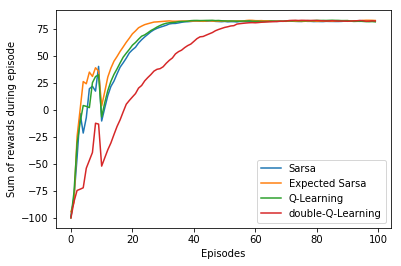

In [24]:
# the following are the code for all TD methods for n episodes and m runs

# initial state action pair values q_sa
q_sa = np.zeros((4, WORLD_HEIGHT, WORLD_WIDTH))

# Use 20 independent runs and average to draw
def figure_compare():
    # averaging the reward sums from 10 successive episodes
    averageRange = 10
    
    # episodes of each run
    nEpisodes = 100

    # perform 20 independent runs
    runs = 20

    rewardsSarsa = np.zeros(nEpisodes)
    rewardsExpectedSarsa = np.zeros(nEpisodes)
    rewardsQLearning = np.zeros(nEpisodes)
    rewardsDoubleQLearning = np.zeros(nEpisodes)
    
    start_time = time.time()
    for run in range(0, runs):
        q_sa_sarsa = np.copy(q_sa)
        for i in range(0, nEpisodes):
            # cut off the value by -100 to draw the figure more elegantly
            rewardsSarsa[i] += max(sarsa(q_sa_sarsa), -100)
    print("-SARSA-- %s seconds ---" % (time.time() - start_time))  
    
    start_time = time.time()
    for run in range(0, runs):
        q_sa_e_sarsa = np.copy(q_sa)
        for i in range(0, nEpisodes):
            # cut off the value by -100 to draw the figure more elegantly
            rewardsExpectedSarsa[i] += max(sarsa(q_sa_e_sarsa,expected=True,alpha=.5), -100)
    print("-EXPECTED-SARSA-- %s seconds ---" % (time.time() - start_time))  
    
    start_time = time.time()        
    for run in range(0, runs):
        q_sa_q_learning = np.copy(q_sa)
        for i in range(0, nEpisodes):
            # cut off the value by -100 to draw the figure more elegantly
            rewardsQLearning[i] += max(qLearning(q_sa_q_learning), -100)
    print("-Q-Learning-- %s seconds ---" % (time.time() - start_time)) 

    
    start_time = time.time()        
    for run in range(0, runs):
        q1_sa_q_learning = np.copy(q_sa)
        q2_sa_q_learning = np.copy(q_sa)
        for i in range(0, nEpisodes):
            # cut off the value by -100 to draw the figure more elegantly
            rewardsDoubleQLearning[i] += max(doubleQLearning(q1_sa_q_learning,  q2_sa_q_learning), -100)
    print("-double-Q-Learning-- %s seconds ---" % (time.time() - start_time)) 

    # averaging over independt runs
    rewardsSarsa /= runs
    rewardsExpectedSarsa /= runs
    rewardsQLearning /= runs
    rewardsDoubleQLearning /= runs
    
    # averaging over successive episodes
    smoothedRewardsSarsa = np.copy(rewardsSarsa)
    smoothedRewardsExpectedSarsa = np.copy(rewardsExpectedSarsa)
    smoothedRewardsQLearning = np.copy(rewardsQLearning)
    smoothedRewardsDoubleQLearning = np.copy(rewardsDoubleQLearning)
    for i in range(averageRange, nEpisodes):
        smoothedRewardsSarsa[i] = np.mean(rewardsSarsa[i - averageRange: i + 1])
        smoothedRewardsExpectedSarsa[i] = np.mean(rewardsExpectedSarsa[i - averageRange: i + 1])
        smoothedRewardsQLearning[i] = np.mean(rewardsQLearning[i - averageRange: i + 1])
        smoothedRewardsDoubleQLearning[i] = np.mean(rewardsDoubleQLearning[i - averageRange: i + 1])
        
    # display optimal policy
    print('Sarsa Optimal Policy:')
    printOptimalPolicy(q_sa_sarsa)
    print('Expected Sarsa Optimal Policy:')
    printOptimalPolicy(q_sa_e_sarsa)
    print('Q-Learning Optimal Policy:')
    printOptimalPolicy(q_sa_q_learning)
    print('Double Q-Learning Optimal Policy:')
    print('q1----------------------------------')
    printOptimalPolicy(q1_sa_q_learning)
    print('q2----------------------------------')
    printOptimalPolicy(q1_sa_q_learning)
    
    # draw reward curves
    plt.figure(1)
    plt.plot(smoothedRewardsSarsa, label='Sarsa')
    plt.plot(smoothedRewardsExpectedSarsa, label='Expected Sarsa')
    plt.plot(smoothedRewardsQLearning, label='Q-Learning')
    plt.plot(smoothedRewardsDoubleQLearning, label='double-Q-Learning')
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards during episode')
    plt.legend()

# Due to limited capacity of calculation of my machine, I can't complete this experiment
# with 100,000 episodes and 50,000 runs to get the fully averaged performance
# However even I only play for 1,000 episodes and 10 runs, the curves looks still good.

figure_compare()
plt.show()

### Result analysis:
1. Compared to SARSA, expected SARSA learns faster than SARSA at the beginning of the learning. I believe this is due to the higher variance brought by sampling the action in the next state in SARSA.

2. The maze is a simple problem, where all the algorithms converged to relatively same optimal policies after about 50 episodes. Although the best actions in some states are different among algorithms, those states are never visited based on the greedy policy with respect to the state-action values such as the bottom right corner of the maze.  

3. Double Q-learning learns the slowest, which makes sense to me, because we need to use more time steps to learn and update both Q1 and Q2. Eventually double Q-learning algorithm catches up with more episodes. 

## Experiment 2: Cliff Walking

### Define the environment

In [35]:
# define the environment
# world height
WORLD_HEIGHT = 4

# world width
WORLD_WIDTH = 12

# probability for exploration
epsilon = 0.1

# step size
alpha = 0.5

# gamma for Q-Learning and Expected Sarsa
GAMMA = 1

# all possible actions
a_up = 0
a_down = 1
a_left = 2
a_right = 3
actions = [a_up, a_down, a_left, a_right]

# initial state action pair values
q_sa = np.zeros((4, WORLD_HEIGHT, WORLD_WIDTH))
startState = [3, 0]
goalState = [3, 11]

# reward for each action in each state
actionRewards = np.zeros((4, WORLD_HEIGHT, WORLD_WIDTH))
actionRewards[:, :, :] = -1.0
actionRewards[a_down, 2, 1:11] = -100.0
actionRewards[a_right, 3, 0] = -100.0

# set up destinations for each action in each state
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destinaion = dict()
        destinaion[a_up] = [max(i - 1, 0), j]
        destinaion[a_left] = [i, max(j - 1, 0)]
        destinaion[a_right] = [i, min(j + 1, WORLD_WIDTH - 1)]
        if i == 2 and 1 <= j <= 10:
            destinaion[a_down] = startState
        else:
            destinaion[a_down] = [min(i + 1, WORLD_HEIGHT - 1), j]
        actionDestination[-1].append(destinaion)
actionDestination[3][0][a_right] = startState

### Generate the graph: 

-SARSA-- 4.21607685089 seconds ---
-EXPECTED-SARSA-- 6.06430792809 seconds ---
-Q-Learning-- 4.49910998344 seconds ---
-double-Q-Learning-- 10.283452034 seconds ---
Sarsa Optimal Policy:
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'D']
['U', 'R', 'U', 'U', 'U', 'R', 'R', 'R', 'U', 'R', 'R', 'D']
['U', 'L', 'U', 'U', 'R', 'U', 'U', 'R', 'R', 'R', 'R', 'D']
['U', 'L', 'U', 'U', 'R', 'L', 'U', 'D', 'D', 'D', 'R', 'G']
Expected Sarsa Optimal Policy:
['L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['U', 'U', 'R', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'R', 'D']
['U', 'D', 'U', 'D', 'D', 'U', 'L', 'L', 'R', 'R', 'R', 'G']
Q-Learning Optimal Policy:
['D', 'L', 'R', 'L', 'R', 'D', 'D', 'R', 'R', 'U', 'R', 'D']
['D', 'R', 'R', 'D', 'R', 'R', 'D', 'R', 'R', 'R', 'D', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['U', 'U', 'U', 'D', 'U', 'R', 'U', 'R', 'U', 'U', 'D', 'G']
Double Q-Learning Optim

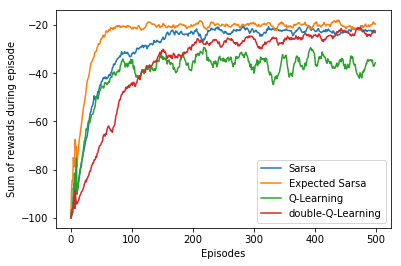

In [40]:
# Use 20 independent runs and average to draw
def figure_compare():
    # averaging the reward sums from 10 successive episodes
    averageRange = 10
    
    # episodes of each run
    nEpisodes = 500

    # perform 20 independent runs
    runs = 20

    rewardsSarsa = np.zeros(nEpisodes)
    rewardsExpectedSarsa = np.zeros(nEpisodes)
    rewardsQLearning = np.zeros(nEpisodes)
    rewardsDoubleQLearning = np.zeros(nEpisodes)
    
    start_time = time.time()
    for run in range(0, runs):
        q_sa_sarsa = np.copy(q_sa)
        for i in range(0, nEpisodes):
            # cut off the value by -100 to draw the figure more elegantly
            rewardsSarsa[i] += max(sarsa(q_sa_sarsa), -100)
    print("-SARSA-- %s seconds ---" % (time.time() - start_time))  
    
    start_time = time.time()
    for run in range(0, runs):
        q_sa_e_sarsa = np.copy(q_sa)
        for i in range(0, nEpisodes):
            # cut off the value by -100 to draw the figure more elegantly
            rewardsExpectedSarsa[i] += max(sarsa(q_sa_e_sarsa,expected=True,alpha=.5), -100)
    print("-EXPECTED-SARSA-- %s seconds ---" % (time.time() - start_time))  
    
    start_time = time.time()        
    for run in range(0, runs):
        q_sa_q_learning = np.copy(q_sa)
        for i in range(0, nEpisodes):
            # cut off the value by -100 to draw the figure more elegantly
            rewardsQLearning[i] += max(qLearning(q_sa_q_learning), -100)
    print("-Q-Learning-- %s seconds ---" % (time.time() - start_time)) 

    
    start_time = time.time()        
    for run in range(0, runs):
        q1_sa_q_learning = np.copy(q_sa)
        q2_sa_q_learning = np.copy(q_sa)
        for i in range(0, nEpisodes):
            # cut off the value by -100 to draw the figure more elegantly
            rewardsDoubleQLearning[i] += max(doubleQLearning(q1_sa_q_learning,  q2_sa_q_learning), -100)
    print("-double-Q-Learning-- %s seconds ---" % (time.time() - start_time)) 

    # averaging over independt runs
    rewardsSarsa /= runs
    rewardsExpectedSarsa /= runs
    rewardsQLearning /= runs
    rewardsDoubleQLearning /= runs
    
    # averaging over successive episodes
    smoothedRewardsSarsa = np.copy(rewardsSarsa)
    smoothedRewardsExpectedSarsa = np.copy(rewardsExpectedSarsa)
    smoothedRewardsQLearning = np.copy(rewardsQLearning)
    smoothedRewardsDoubleQLearning = np.copy(rewardsDoubleQLearning)
    for i in range(averageRange, nEpisodes):
        smoothedRewardsSarsa[i] = np.mean(rewardsSarsa[i - averageRange: i + 1])
        smoothedRewardsExpectedSarsa[i] = np.mean(rewardsExpectedSarsa[i - averageRange: i + 1])
        smoothedRewardsQLearning[i] = np.mean(rewardsQLearning[i - averageRange: i + 1])
        smoothedRewardsDoubleQLearning[i] = np.mean(rewardsDoubleQLearning[i - averageRange: i + 1])
        
    # display optimal policy
    print('Sarsa Optimal Policy:')
    printOptimalPolicy(q_sa_sarsa)
    print('Expected Sarsa Optimal Policy:')
    printOptimalPolicy(q_sa_e_sarsa)
    print('Q-Learning Optimal Policy:')
    printOptimalPolicy(q_sa_q_learning)
    print('Double Q-Learning Optimal Policy:')
    print('q1----------------------------------')
    printOptimalPolicy(q1_sa_q_learning)
    print('q2----------------------------------')
    printOptimalPolicy(q1_sa_q_learning)
    
    # draw reward curves
    plt.figure(1)
    plt.plot(smoothedRewardsSarsa, label='Sarsa')
    plt.plot(smoothedRewardsExpectedSarsa, label='Expected Sarsa')
    plt.plot(smoothedRewardsQLearning, label='Q-Learning')
    plt.plot(smoothedRewardsDoubleQLearning, label='double-Q-Learning')
    plt.xlabel('Episodes')
    plt.ylabel('Sum of rewards during episode')
    plt.legend()

# Due to limited capacity of calculation of my machine, I can't complete this experiment
# with 100,000 episodes and 50,000 runs to get the fully averaged performance
# However even I only play for 1,000 episodes and 10 runs, the curves looks still good.

figure_compare()
plt.show()

### Result analysis:
The results from the cliff walking problem are more interesting.

1. Looking at the path based on greedy actions from the Q values  after 500 episodes, we can see that SARSA learned to take the path far away from the cliff by going to the top row; expected SARSA learned to follow the path on the second top row instead of the top row; Q learning learned to take the row right above the cliff because its target policy is greedy with respect to Q values as we discussed in the lecture. What is interesting to me is that the double Q-learning actually learned a different path than any of the previous algorithms. With difference runs, the paths are different. For example, on one run, it took the row right above the cliff for a few steps and then went up by one row to be safer. 

2. The results on cliff walking still match what we had in the first experiment: Expected SARSA learned the fastest and performed the best. Double Q-learning learned slower at the beginning and eventually catches  up.